<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 1</center></h3>

In [ ]:
# Include libraries which may use in implementation
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import sklearn 
from sklearn.model_selection import train_test_split

In [ ]:
# Create a Neural_Network class
class Neural_Network(object):    
    def __init__(self,inputSize = 2,outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize   
        # randomly initialize W1 using random function of numpy
        self.W1 = np.random.rand(inputSize +1, outputSize)  # size of the weight will be (inputSize +1, outputSize) that +1 is for bias 
       
        
        

    def one_to_x(self, X):
    # stack vector of 1 to X
        return np.hstack((np.ones((X.shape[0],1)),X)) # Stack arrays in sequence horizontally (column wise)

    def feedforward(self, X):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. sigmoid)
        z = np.dot(self.one_to_x(X), self.W1)
        self.activation = self.sigmoid(z)
        return self.activation


    def sigmoid(self, s):
        # activation function
        return 1 / (1 + np.exp(-s))

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return s * (1 - s)

    def crossentropy_derivative(self, Y, Y_pred):
        #derivative of crossentropy
        return np.divide(Y_pred-Y, Y_pred*(1-Y_pred))  

    def backwardpropagate(self,X, Y, y_pred, lr):
        
        # backward propagate through the network
        # derivative w.r.t y_pred
        e = self.crossentropy_derivative(Y, y_pred)
        # derivative w.r.t sigmoid
        d = self.sigmoid_derivative(y_pred)
        # chain rule to get derivative w.r.t weight vector
        gradient = np.dot(self.one_to_x(X).T, e*d)     
        # gradient descent to adjust set of weights
        self.W1 = self.W1 - lr*gradient
    
    def crossentropy(self, Y, Y_pred):
        return (1/Y_pred.shape[0])*np.sum(-1*np.multiply(Y, np.log(Y_pred+ 1e-5)) - np.multiply((1-Y), np.log(1-Y_pred+ 1e-5)))


    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = None, validationY = None):
    
        valid_available = validationX is not None and validationY is not None
        trainY = trainY.reshape(trainY.shape[0], 1)
     
        if valid_available:
            validationY = validationY.reshape(validationY.shape[0], 1)
  
        # plot error of the model if plot_err is true
        validation_loss =[]  
        validation_accuracy =[]  
        training_loss = []
        training_accuracy = []

        # feed forward trainX and trainY and recivce predicted value
        for epoch in range(epochs):
          y_pred = self.feedforward(trainX)
          self.backwardpropagate(trainX, trainY, y_pred, learningRate)   # backpropagation with trainX, trainY, predicted value and learning rate.
          train_loss = self.crossentropy(y_pred,trainY)
          training_loss.append(train_loss)
          train_accuracy = self.accuracy(trainX, trainY)
          training_accuracy.append(train_accuracy)
          print('Epoch: {} -> training_loss:{:.4f}, Accuracy {:.4f}'.format(epoch, train_loss,train_accuracy))

          # if validationX and validationY are not null than show validation accuracy and error of the model by printing values.
          if validationX is not None and validationY is not None:
             val_pred = self.feedforward(validationX)
              # validation loss calculation
             val_loss = self.crossentropy(val_pred,validationY)
             val_accuracy = self.accuracy(validationX, validationY)
             validation_loss.append(val_loss)
             validation_accuracy.append(val_accuracy)
             print('Epoch: {} -> validation_loss:{:.4f}, Accuracy {:.4f}'.format(epoch, val_loss,val_accuracy))

        # plot error of the model if plot_err is true
        if plot_err:
          # loss curves
          plt.figure(figsize=(8,4))
          plt.title("Training and Validation Loss")
          plt.plot(validation_loss,label="val")
          plt.plot(training_loss,label="train")
          plt.xlabel("iterations")
          plt.ylabel("Loss")
          plt.legend()
          plt.show()

          # accuracy curves
          plt.figure(figsize=(8,4))
          plt.title("Training and Validation Accuracy")
          plt.plot(validation_accuracy,label="val")
          plt.plot(training_accuracy,label="train")
          plt.xlabel("iterations")
          plt.ylabel("Accuracy")
          plt.legend()
          plt.show() 

    def predict(self, testX):
        # predict the value of testX
        return self.feedforward(testX)
    
    def accuracy(self, testX, testY):
        
        testY = testY.reshape(testY.shape[0], -1)
        
        prediction = self.predict(testX)
        
        prediction[prediction>=0.5] = 1
        prediction[prediction<0.5] = 0
        accu = np.mean(prediction==testY)
        # predict the value of trainX
        # compare it with testY
        # compute accuracy, print it and show in the form of picture
        return accu # return accuracy 
        
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        with open(name, 'wb') as file:
            pickle.dump(self.W1, file)
        
    def loadModel(self,name):
        # load your trained model, load exactly how you stored it.
        with open(name, 'rb') as file:
            self.W1 = pickle.load(file)
    


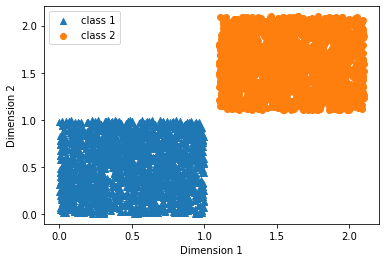

In [ ]:
# generating dataset point
np.random.seed(1)
no_of_samples = 2000
dims = 2
#Generating random points of values between 0 to 1
class1=np.random.rand(no_of_samples,dims)
#To add separability we will add a bias of 1.1
class2=np.random.rand(no_of_samples,dims)+1.1
class_1_label=np.array([1 for n in range(no_of_samples)])
class_2_label=np.array([0 for n in range(no_of_samples)])
#Lets visualize the dataset
plt.scatter(class1[:,0],class1[:,1], marker='^', label="class 1")
plt.scatter(class2[:,0],class2[:,1], marker='o', label="class 2")
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(loc='best')
plt.show()

In [ ]:
import sklearn 
from sklearn.model_selection import train_test_split
# Data concatenation
data = np.concatenate((class1,class2),axis=0)
label = np.concatenate((class_1_label,class_2_label),axis=0)

random_seed= 42
indices = list(range(data.shape[0]))

np.random.seed(random_seed)
np.random.shuffle(indices)

# Distribute this data into three parts i.e. training, validation and testing

trainX, testX, trainY, testY = train_test_split(data, label, test_size=0.2) # split data into train and test
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2) # split train data into validation and training




Epoch: 0 -> training_loss:6.9975, Accuracy 0.5008
Epoch: 0 -> validation_loss:4.8256, Accuracy 0.5062
Epoch: 1 -> training_loss:4.8853, Accuracy 0.6770
Epoch: 1 -> validation_loss:4.3423, Accuracy 0.6859
Epoch: 2 -> training_loss:4.3915, Accuracy 0.8355
Epoch: 2 -> validation_loss:3.9521, Accuracy 0.8359
Epoch: 3 -> training_loss:4.0071, Accuracy 0.9051
Epoch: 3 -> validation_loss:3.5977, Accuracy 0.9031
Epoch: 4 -> training_loss:3.6573, Accuracy 0.9504
Epoch: 4 -> validation_loss:3.3057, Accuracy 0.9422
Epoch: 5 -> training_loss:3.3682, Accuracy 0.9629
Epoch: 5 -> validation_loss:3.0497, Accuracy 0.9547
Epoch: 6 -> training_loss:3.1141, Accuracy 0.9707
Epoch: 6 -> validation_loss:2.8324, Accuracy 0.9672
Epoch: 7 -> training_loss:2.8980, Accuracy 0.9789
Epoch: 7 -> validation_loss:2.6434, Accuracy 0.9734
Epoch: 8 -> training_loss:2.7095, Accuracy 0.9855
Epoch: 8 -> validation_loss:2.4793, Accuracy 0.9766
Epoch: 9 -> training_loss:2.5455, Accuracy 0.9883
Epoch: 9 -> validation_loss:2.33

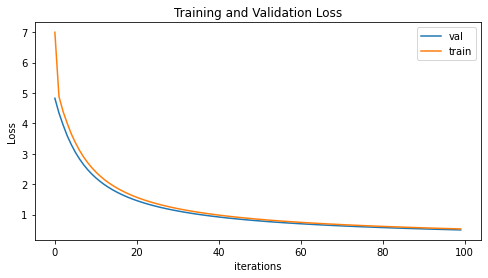

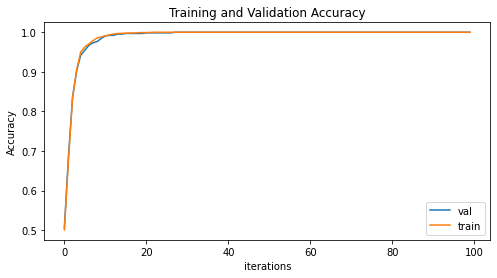

In [ ]:
model = Neural_Network(2,1)
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 100, learningRate = 0.001, validationX = validX, validationY = validY)

In [ ]:
#save the best model which you have trained, 
model.saveModel('bestmodeltask1.mdl')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [ ]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('bestmodeltask1.mdl')
# check accuracy of that model
mm.accuracy(testX,testY)




1.0